In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

computers = pd.read_csv("C:\\D\\infosys\\datasets\\computers.csv")
computers.head()

,Units,Minutes
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74


In [2]:
mean_value = computers['Minutes'].mean()
median_value = computers['Minutes'].median()

Text(0, 0.5, 'Minutes')

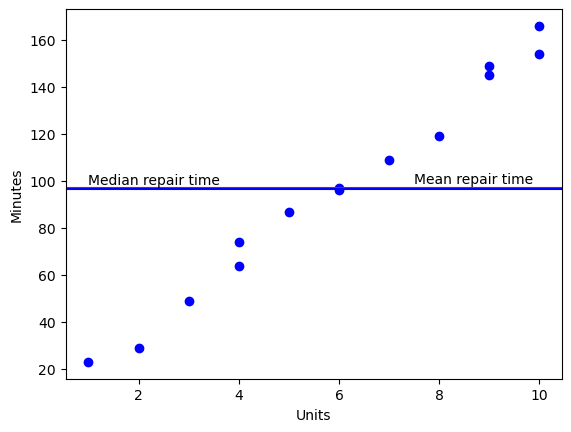

In [3]:
plt.scatter(computers['Units'], computers['Minutes'], color = 'blue', marker = 'o')
plt.axhline(y= mean_value, c = 'r')
plt.axhline(y = median_value, c= 'b')
plt.annotate('Mean repair time', xy = (7.5, mean_value+2))
plt.annotate('Median repair time', xy = (1, median_value+2))
plt.xlabel('Units')
plt.ylabel('Minutes')

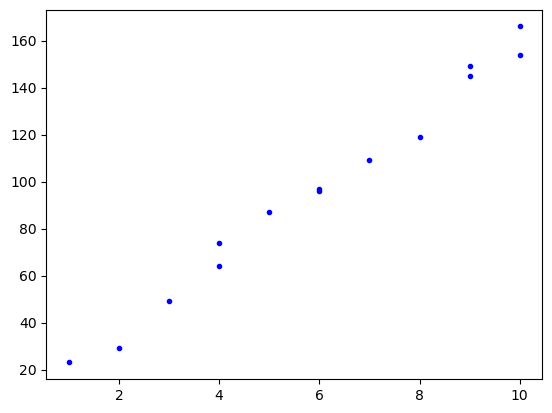

In [4]:
plt.scatter(computers['Units'], computers['Minutes'], color = 'blue', marker = '.')

In [5]:
computers.head(10)

,Units,Minutes
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74
5,5,87
6,6,96
7,6,97
8,7,109
9,8,119


In [6]:
minutes_model0 = computers['Minutes'].mean()
minutes_model1 = 10 + 12*computers['Units']
minutes_model2 = 6 + 18*computers['Units']
computers.head(10)

,Units,Minutes
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74
5,5,87
6,6,96
7,6,97
8,7,109
9,8,119


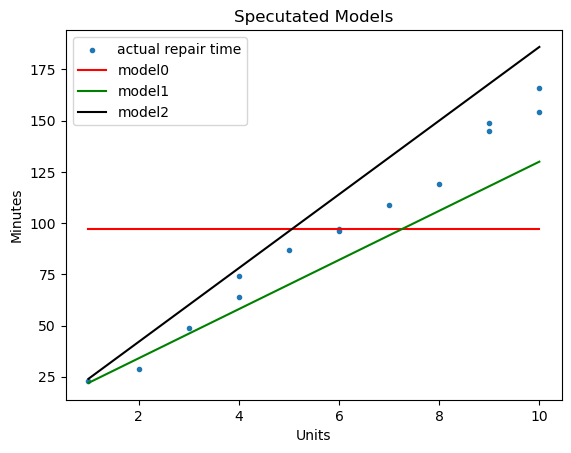

In [7]:
fig, ax = plt.subplots()
computers['min_model0']=minutes_model0;
computers['min_model1']=minutes_model1;
computers['min_model2']=minutes_model2;
ax.scatter(x = 'Units', y = 'Minutes', data = computers, label = 'actual repair time', marker = '.')
ax.plot(computers['Units'], computers['min_model0'], c = 'r', label = 'model0')
ax.plot(computers['Units'], computers['min_model1'], c = 'g', label = 'model1')
ax.plot(computers['Units'], computers['min_model2'], c = 'black', label = 'model2')
ax.set_ylabel('Minutes')
ax.set_xlabel('Units')
ax.set_title('Specutated Models')
ax.legend()

In [8]:
model0_obs = pd.DataFrame({'Units':computers['Units'], 'Actual-time':computers['Minutes'], 'Predicted-time':computers['min_model0'], 'Error':(computers['min_model0'] - computers['Minutes'])})
model0_obs

,Units,Actual-time,Predicted-time,Error
0,1,23,97.214286,74.214286
1,2,29,97.214286,68.214286
2,3,49,97.214286,48.214286
3,4,64,97.214286,33.214286
4,4,74,97.214286,23.214286
5,5,87,97.214286,10.214286
6,6,96,97.214286,1.214286
7,6,97,97.214286,0.214286
8,7,109,97.214286,-11.785714
9,8,119,97.214286,-21.785714


In [9]:
print(sum(model0_obs['Error']))

1.4210854715202004e-14


In [10]:
print(sum(model0_obs['Error']**2))

27768.357142857145


In [11]:
model1_obs = pd.DataFrame({'Units':computers.Units, 'Actual-time':computers.Minutes, 'Predicted-time':computers.min_model1, 'Error':(computers.min_model1 - computers.Minutes)})
model1_obs

,Units,Actual-time,Predicted-time,Error
0,1,23,22,-1
1,2,29,34,5
2,3,49,46,-3
3,4,64,58,-6
4,4,74,58,-16
5,5,87,70,-17
6,6,96,82,-14
7,6,97,82,-15
8,7,109,94,-15
9,8,119,106,-13


In [12]:
print(sum((model1_obs.Error)**2))

4993


In [13]:
model2_obs = pd.DataFrame({'Units':computers.Units, 'Actual-time':computers.Minutes, 'Predicted-time':computers.min_model2, 'Error':(computers.min_model2 - computers.Minutes)})
model2_obs

,Units,Actual-time,Predicted-time,Error
0,1,23,24,1
1,2,29,42,13
2,3,49,60,11
3,4,64,78,14
4,4,74,78,4
5,5,87,96,9
6,6,96,114,18
7,6,97,114,17
8,7,109,132,23
9,8,119,150,31


In [14]:
print(sum((model2_obs.Error)**2))

5001


In [15]:
x = computers.Units
y = computers.Minutes

xiyi = x*y

n = len(computers)
# simple linear regression model = B0 + B1x1 + epsilon(error)
# y= B0 + B1x1 + epsilon (error)
# B0 = ymean - m.xmean
# B1 = xiyi - n*xmean*ymean /(xi**2)-(n*xmean**2)
xmean = computers.Units.mean()
ymean = computers.Minutes.mean()
numerator = xiyi.sum() - n*xmean*ymean
denominator = (x**2).sum() - n*(xmean**2)
m = numerator/denominator
c = ymean - (m*xmean)
print('intercept: ', c, 'coefficient: ', m)

intercept:  4.161654135338296 coefficient:  15.508771929824569


In [16]:
min_best_fit_model = c + m*computers.Units
computers['min_best_fit_model'] = min_best_fit_model
computers[['Units', 'Minutes', 'min_best_fit_model']]

,Units,Minutes,min_best_fit_model
0,1,23,19.670426
1,2,29,35.179198
2,3,49,50.687970
3,4,64,66.196742
4,4,74,66.196742
5,5,87,81.705514
6,6,96,97.214286
7,6,97,97.214286
8,7,109,112.723058
9,8,119,128.231830


Text(0.5, 1.0, 'Best fit model line')

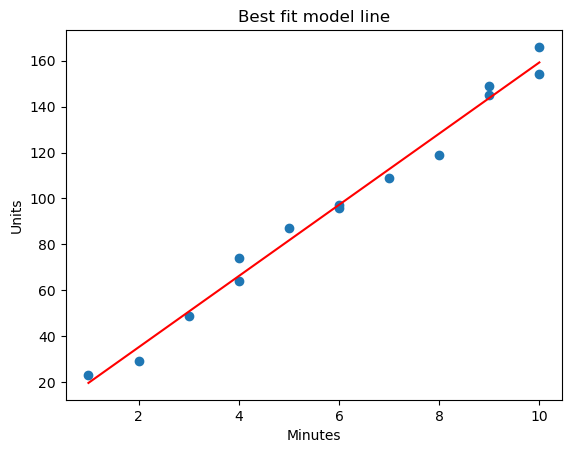

In [17]:
fig, ax = plt.subplots()
ax.scatter(x = 'Units', y= 'Minutes', data = computers)
ax.plot(computers.Units, computers.min_best_fit_model, c = 'r')
ax.set_xlabel('Minutes')
ax.set_ylabel('Units')
ax.set_title('Best fit model line')

In [18]:
best_fit_model_obs = pd.DataFrame({'Units':computers.Units,'Actual-time':computers.Minutes, 'Predicted-time':computers.min_best_fit_model, 'Error':(computers.min_best_fit_model - computers.Minutes)})
best_fit_model_obs

,Units,Actual-time,Predicted-time,Error
0,1,23,19.670426,-3.329574
1,2,29,35.179198,6.179198
2,3,49,50.687970,1.687970
3,4,64,66.196742,2.196742
4,4,74,66.196742,-7.803258
5,5,87,81.705514,-5.294486
6,6,96,97.214286,1.214286
7,6,97,97.214286,0.214286
8,7,109,112.723058,3.723058
9,8,119,128.231830,9.231830


In [19]:
print(sum((best_fit_model_obs.Error)**2))

348.848370927318


In [20]:
X = computers[['Units']]
y = computers['Minutes']
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X, y)
print("Intercept: ", model.intercept_)
print("Coefficients: ", model.coef_)

Intercept:  4.161654135338296
Coefficients:  [15.50877193]


In [21]:
SST = sum((computers.Minutes.mean() - computers.Minutes)**2)
print(SST)
#sum of squared total

SSE = sum(best_fit_model_obs.Error**2)
print(SSE)
#sum of squared error

SSR = SST -SSE
print(SSR)
#sum of squared regression

Rsq = SSR/SST
print(Rsq)

Rsq1 = model.score(computers[['Units']], y)
Rsq1

27768.357142857145
348.848370927318
27419.508771929828
0.9874371980620736


0.9874371980620736

# Exercise

In [22]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
from sklearn.model_selection import train_test_split

data = pd.read_csv('C:\\D\\infosys\\bostonhousing1603883195869.zip')

In [23]:
data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [24]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data = pd.read_csv('D:\\infosys\\bostonhousing1603883195869.zip')
predictor = data[['RM']]
target = data.MEDV
plt.scatter(predictor, target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
model = LinearRegression()
model.fit(X_train, y_train)
print('coefficient: ', model.coef_)
print('Intercept: ', model.intercept_)
SST = sum((data.MEDV.mean()-data.MEDV)**2)
SSE = sum((data.y_train - data.))

SyntaxError: invalid syntax (968438764.py, line 17)

# Multiple Linear Regression 

Intercept:  2.3412311451922037 
 Coefficients:  [1.61590721 0.01438483]


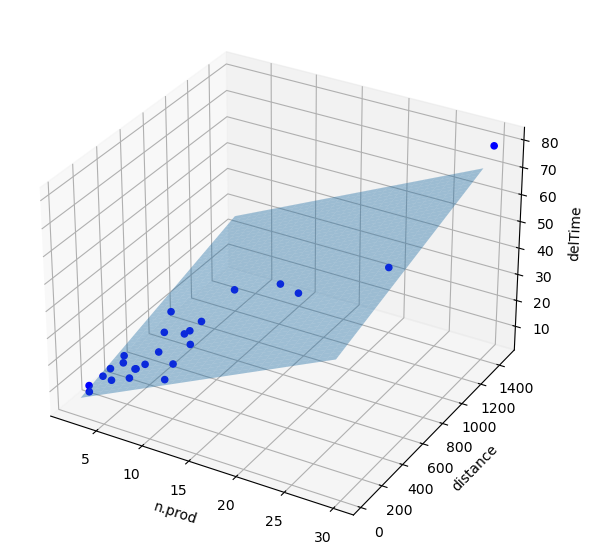

In [25]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
model = LinearRegression()
delivery = pd.read_csv('C:\\D\\infosys\\delivery.csv')
X = delivery[['n.prod', 'distance']]
y = delivery['delTime']

model.fit(X,y)

print("Intercept: ", model.intercept_, "\n Coefficients: ", model.coef_)

fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111, projection = '3d')
#projeciton = '3d' is used to have 3D axes

ax.scatter(xs = delivery['n.prod'], ys = delivery['distance'], zs = delivery['delTime'], c = 'b', alpha = 1, marker = 'o')
ax.set_xlabel('n.prod')
ax.set_ylabel('distance')
ax.set_zlabel('delTime')

x_surf = np.arange(delivery['n.prod'].min(), delivery['n.prod'].max(), 1)
y_surf = np.arange(delivery['distance'].min(), delivery['distance'].max(), 1)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)
X_mesh = pd.core.frame.DataFrame({'n.prod':x_surf.ravel(),'distance':y_surf.ravel()})
out = model.predict(X_mesh)
ax.plot_surface(x_surf, y_surf, out.reshape(x_surf.shape),alpha = 0.4)

In [26]:
delivery.head(10)

,n.prod,distance,delTime
0,7,560,16.68
1,3,220,11.50
2,3,340,12.03
3,4,80,14.88
4,6,150,13.75
5,7,330,18.11
6,2,110,8.00
7,7,210,17.83
8,30,1460,79.24
9,5,605,21.50


In [27]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   n.prod    25 non-null     int64  
 1   distance  25 non-null     int64  
 2   delTime   25 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 728.0 bytes


# Linear independence of predictiors

correlation (check for multiple colinearility)

In [28]:
np.corrcoef(delivery['n.prod'], delivery['distance'])

array([[1.      , 0.824215],
       [0.824215, 1.      ]])

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.Series([variance_inflation_factor(X.values, idx) for idx in range(X.shape[1])],index = X.columns)
print(vif)

n.prod      7.848245
distance    7.848245
dtype: float64


In [30]:
# R** = SSR/SST = 1-SSE/SST
model.score(X,y)
#the values of R** that are close to 1 are considered useful
#0.9595937494832257 indicates 95.96% varirability in delTime of the vending macine 

0.9595937494832257

In [31]:
#the code below show the increase in the R** for an additional predictor that is included in the model

#model with single predictor - n.prod

model1 = LinearRegression()
features = ['n.prod']
target = ['delTime']

model1.fit(delivery[features], delivery[target])
print(model1.score(delivery[features], delivery[target]))
#sample model1 score = 0.9304813135986655

#model with multiple predictors - n.prod, distance 

model2 = LinearRegression()
features = ["n.prod", "distance"]
target = ["delTime"]
model2.fit(delivery[features], delivery[target])
print(model2.score(delivery[features], delivery[target]))
#sample model2 score = 0.9595937494832257

#adjusted R^2
X = delivery[features]
y = delivery[target]
adjusted_rscore = 1 - (1-model2.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)
print (adjusted_rscore)


0.9304813135986856
0.9595937494832257
0.9559204539817008


cat_features = ["view"] 
house_data_df = pd.get_dummies(house_data_df, columns = cat_features)
print(house_data_df.columns)

# end-to-end Machine Learning process of Regression analysis

In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

house_data = pd.read_csv("C:\\D\\infosys\\datasets\\kc_house_data.csv")

In [33]:
# To determine the size of the data
print(house_data.shape)

(21613, 21)


In [34]:
# To determine the columns in the data
print(house_data.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [35]:
print(house_data.info)

<bound method DataFrame.info of                id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   

In [36]:
#View information about the data in each columns
print(house_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# Feature Engineering

It involves the following taks:- 
* Selecting features to work on.(eg- we create two new features -year and month from the date)
* Encoding the categorical features
* Normalizing the continuous numerical features

### 1.Selecting features

#### **price is taken as target** (in this example)

In [38]:
house_data_df = house_data[['price', 'date', 'bedrooms',
                            'bathrooms', 'sqft_living', 'floors',
                            'waterfront', 'view', 'condition',
                            'grade', 'zipcode']]

In [40]:
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [46]:
# making new columns for the year and month from date
house_data_df.loc[:, "year"] = house_data["date"].str[0:4]
house_data_df.loc[:, "month"] = house_data["date"].str[4:6]

#removing date column after extraction
# house_data_df = house_data_df.drop(columns=["date"])

In [47]:
house_data_df.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,zipcode,year,month
0,221900.0,3,1.00,1180,1.0,0,0,3,7,98178,2014,10
1,538000.0,3,2.25,2570,2.0,0,0,3,7,98125,2014,12
2,180000.0,2,1.00,770,1.0,0,0,3,6,98028,2015,02
3,604000.0,4,3.00,1960,1.0,0,0,5,7,98136,2014,12
4,510000.0,3,2.00,1680,1.0,0,0,3,8,98074,2015,02


### 2.Encoding the categorical features (using pandas get_dummies() function to encode a categorical column)


the get_dummies() function divides one categorical column into multiple columns like if a "view" column have 4 types of value i.e. '1', '2', '3', '4' then the new columns made would be view_1, view_2, view_3, view_4

In [49]:
cat_features = ["waterfront", "view", "condition", "grade", "year", "month", "zipcode"]
house_data_df = pd.get_dummies(house_data_df, columns = cat_features)
print(house_data_df.columns)

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors',
       'waterfront_0', 'waterfront_1', 'view_0', 'view_1', 'view_2',
       ...
       'zipcode_98146', 'zipcode_98148', 'zipcode_98155', 'zipcode_98166',
       'zipcode_98168', 'zipcode_98177', 'zipcode_98178', 'zipcode_98188',
       'zipcode_98198', 'zipcode_98199'],
      dtype='object', length=113)


### 3.Normalizing the continuous numerical features

The features with continuous numerical values are normalized so that, each and every feature span across a common range of values and would have an equal influence on the model


In [50]:
from sklearn.preprocessing import StandardScaler

#finging mean and standard deviation fo the numerical columns
scaler = StandardScaler().fit(house_data_df[['price', 'bedrooms', 
                                            'bathrooms',
                                            'sqft_living','floors']])
# scaling columns to a common range
house_data_normalized = scaler.transform(house_data_df[['price', 
                                                       'bedrooms', 
                                                       'bathrooms',
                                                       'sqft_living',
                                                       'floors']])
house_data_normalized

array([[-0.86671733, -0.39873715, -1.44746357, -0.97983502, -0.915427  ],
       [-0.00568792, -0.39873715,  0.1756067 ,  0.53363434,  0.93650577],
       [-0.98084935, -1.47395936, -1.44746357, -1.42625404, -0.915427  ],
       ...,
       [-0.37586519, -1.47395936, -1.77207762, -1.15404732,  0.93650577],
       [-0.38158814, -0.39873715,  0.50022075, -0.52252773,  0.93650577],
       [-0.58588173, -1.47395936, -1.77207762, -1.15404732,  0.93650577]])

In [53]:
house_data_df_normalized = pd.DataFrame(house_data_normalized, columns = [
    'price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors'])
house_data_df_normalized = house_data_df_normalized.join(house_data_df
                                                         [house_data_df.columns.drop(['price', 'bedrooms',
                                                                                                  'bathrooms', 'sqft_living',
                                                                                                  'floors'])])

In [54]:
Y = house_data_df_normalized['price']
X = house_data_df_normalized[house_data_df_normalized.columns.drop('price')]
print(X.shape)

(21613, 112)


In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train ,Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 100)
X_train.shape, X_test.shape

((17290, 112), (4323, 112))

In [59]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, Y_train)
train_score = model.score(X_train, Y_train)
test_score = model.score(X_test, Y_test)
print('Train Score(R-Squared):', train_score)
print('Test Score(R-Squared):', test_score)

Train Score(R-Squared): 0.8336454390251273
Test Score(R-Squared): 0.8310895732390757


### Evaluating the model performance using RMSE

The Root Mean Squared Error (RMSE) estimate the avg. error that can be expected from the model 
RMSE = (mean((acutal target value-predicted target value)^2)^0.5

In [64]:
from sklearn.metrics import mean_squared_error

train_predictions = model.predict(X_train)
train_RMSE = mean_squared_error(Y_train, train_predictions)**0.5

test_predictions = model.predict(X_test)
test_RMSE =mean_squared_error(Y_test, test_predictions)**0.5
print('Train RMSE:', train_RMSE)
print('Test RMSE : ', test_RMSE)
# similar or closer the value = model not overfitting

Train RMSE: 0.40786612339616113
Test RMSE :  0.41097640435033245
